# Comparison of EAG/GAF input parameters<a id="top"></a>

_Developed by Davíd Brakenhoff (Artesia) on July 19, 2019_

This notebook shows how input parameters for EAG or GAF balances can be compared in a DataFrame or on a map.

## Contents

- [Modelstructure](#1)
- [Percentage surface water](#2)
- [Get a specific parameter](#3)
- [Get the ID of a specific timeseries](#4)
- [Get the parameters for water quality simulation](#5)
- [Visualize parameter value on a map](#6)

Import the requisite modules

In [1]:
import sys
sys.path.insert(1, "../../")
from waterbalansen_scripts import eagtools

Define file locations:
- csv files containing all the input data for the EAGs and GAFs
- shapefile with shapes for each EAG/GAF

In [2]:
csvdir = r"../../data/input_csv"
shpfile = r"../../data/eag_gaf_shp/Waterbalansen_final.shp"

Initialize the EagComparison object. This will load all csv's. The `filter_str` ensures only files with this string within the name are loaded. This is useful when you only want to load either EAGs or GAFs.

In [3]:
filt = "GAF"

In [4]:
ec = eagtools.EagComparison(csvdir, filter_str=filt)

### [Modelstructure](#top)<a id="1"></a>

The modelstructure attribute contains a DataFrame with each Bucket from each EAG or GAF.

In [5]:
# model structure
ms = ec.modelstructure
ms.head()

,EAGID,EAGCode,BakjeID,BakjeOmschrijving,BakjePyCode,OppWaarde
0,24,2010-GAF,24000002,Verhard,Verhard,1492771.0
1,24,2010-GAF,24000003,OnverhardOngedraineerd,Onverhard,598109.0
2,24,2010-GAF,24000004,OnverhardGedraineerd,Drain,598109.0
3,24,2010-GAF,24000007,Verhard,Verhard,1765.0
4,24,2010-GAF,24000008,OnverhardOngedraineerd,Onverhard,203898.0


Getting the modelstructure for one particular water balance is easy using a mask.

In [6]:
ec.modelstructure.loc[ec.modelstructure.EAGCode == "2010-GAF"]

,EAGID,EAGCode,BakjeID,BakjeOmschrijving,BakjePyCode,OppWaarde
0,24,2010-GAF,24000002,Verhard,Verhard,1492771.0
1,24,2010-GAF,24000003,OnverhardOngedraineerd,Onverhard,598109.0
2,24,2010-GAF,24000004,OnverhardGedraineerd,Drain,598109.0
3,24,2010-GAF,24000007,Verhard,Verhard,1765.0
4,24,2010-GAF,24000008,OnverhardOngedraineerd,Onverhard,203898.0
5,24,2010-GAF,24000009,OnverhardGedraineerd,Drain,203898.0
6,24,2010-GAF,24000000,Water,Water,208842.0


### [Percentage surface water](#top)<a id="2"></a>

Calculation of the percantage of surface water within an area.

In [7]:
# % open water
pw = ec.percentage_open_water()
pw.head()

EAGCode
2010-GAF    6.314401
2100-GAF    7.129927
2110-GAF    6.191186
2120-GAF    6.640681
2130-GAF    4.378873
Name: Open Water %, dtype: float64

### [Get a specific parameter](#top)<a id="3"></a>

In [8]:
# param
hmax = ec.get_parameter("hMax")
hmax.head()

,EAGID,BakjeID,Laagvolgorde,ParamCode,Waarde,Eenheid
EAGCode,,,,,,
2010-GAF,24,24000002,1,hMax,0.002,m
2010-GAF,24,24000002,2,hMax,1.000,m
2010-GAF,24,24000003,1,hMax,1.000,m
2010-GAF,24,24000004,1,hMax,0.700,m
2010-GAF,24,24000004,2,hMax,0.300,m


### [Get the ID of a specific timeseries](#top)<a id="4"></a>

In [9]:
# reeks
p = ec.get_timeseries("Neerslag")
p.head()

,EAGID,BakjeID,Laagvolgorde,ClusterType,ParamType,Waarde,WaardeAlfa,StartDag,Eenheid
EAGCode,,,,,,,,,
2010-GAF,24,-9999,-9999,Neerslag,FEWS,NaN,meteo_meetstation_KNMI|ImportCAW|66013cal|P.me...,NaN,mm/dag
2010-GAF,24,-9999,-9999,Neerslag,Local,NaN,NaN,NaN,mm/dag
2100-GAF,35,-9999,-9999,Neerslag,FEWS,NaN,meteo_meetstation_KNMI|ImportCAW|66004cal|P.me...,NaN,mm/dag
2100-GAF,35,-9999,-9999,Neerslag,Local,NaN,NaN,NaN,mm/dag
2110-GAF,37,-9999,-9999,Neerslag,FEWS,NaN,meteo_meetstation_KNMI|ImportCAW|66004cal|P.me...,NaN,mm/dag


### [Get the parameters for water quality simulation](#top)<a id="5"></a>

In [10]:
# chloride concentratie per flux
cl = ec.get_chloride_param("Verhard")
cl.head()

,EAGID,StofNaam,InlaatType,ReeksType,WaardeAlfa,Waarde,StofIncrement,Eenheid
EAGCode,,,,,,,,
2010-GAF,24,Chloride,Verhard,Constant,NaN,25.0,0,mg/l
2100-GAF,35,Chloride,Verhard,Constant,NaN,10.0,0,mg/l
2110-GAF,37,Chloride,Verhard,Constant,NaN,200.0,0,mg/l
2120-GAF,46,Chloride,Verhard,Constant,NaN,200.0,0,mg/l
2130-GAF,51,Chloride,Verhard,Constant,NaN,20.0,0,mg/l


In [11]:
# fosfor concentratie per flux
f = ec.get_phosphorus_params("Uitspoeling")
f.head()

,EAGID,StofNaam,InlaatType,ReeksType,WaardeAlfa,Waarde,StofIncrement,Eenheid
EAGCode,,,,,,,,
2010-GAF,24,Fosfor,Uitspoeling,Constant,NaN,0.6,0.6,mgP/l
2100-GAF,35,Fosfor,Uitspoeling,Constant,NaN,0.6,0.6,mgP/l
2110-GAF,37,Fosfor,Uitspoeling,Constant,NaN,0.4,0.0,mgP/l
2120-GAF,46,Fosfor,Uitspoeling,Constant,NaN,0.6,0.3,mgP/l
2130-GAF,51,Fosfor,Uitspoeling,Constant,NaN,0.6,0.3,mgP/l


### [Visualize parameter value on a map](#top)<a id="6"></a>

Visualizing the data on a map is possible with the `eagtools.create_gdf` function. This function takes the DataFrame with parameters and joins it to the shapefile. The result is a GeoDataFrame that can be plotted using the `eagtools.plot_gdf` function. 

In [13]:
# create geodataframe and mask EAGs or GAFs
pw.name = "% Open Water"
gdf = eagtools.create_gdf(pw, shpfile, eag_code_column="GAFIDENT")

Select only the GAF shapes from the shapefile:

In [14]:
mask = gdf.index.str.contains("EAG")
if filt == "GAF":
    mask = ~mask
gdf = gdf.loc[mask]

Plot the map

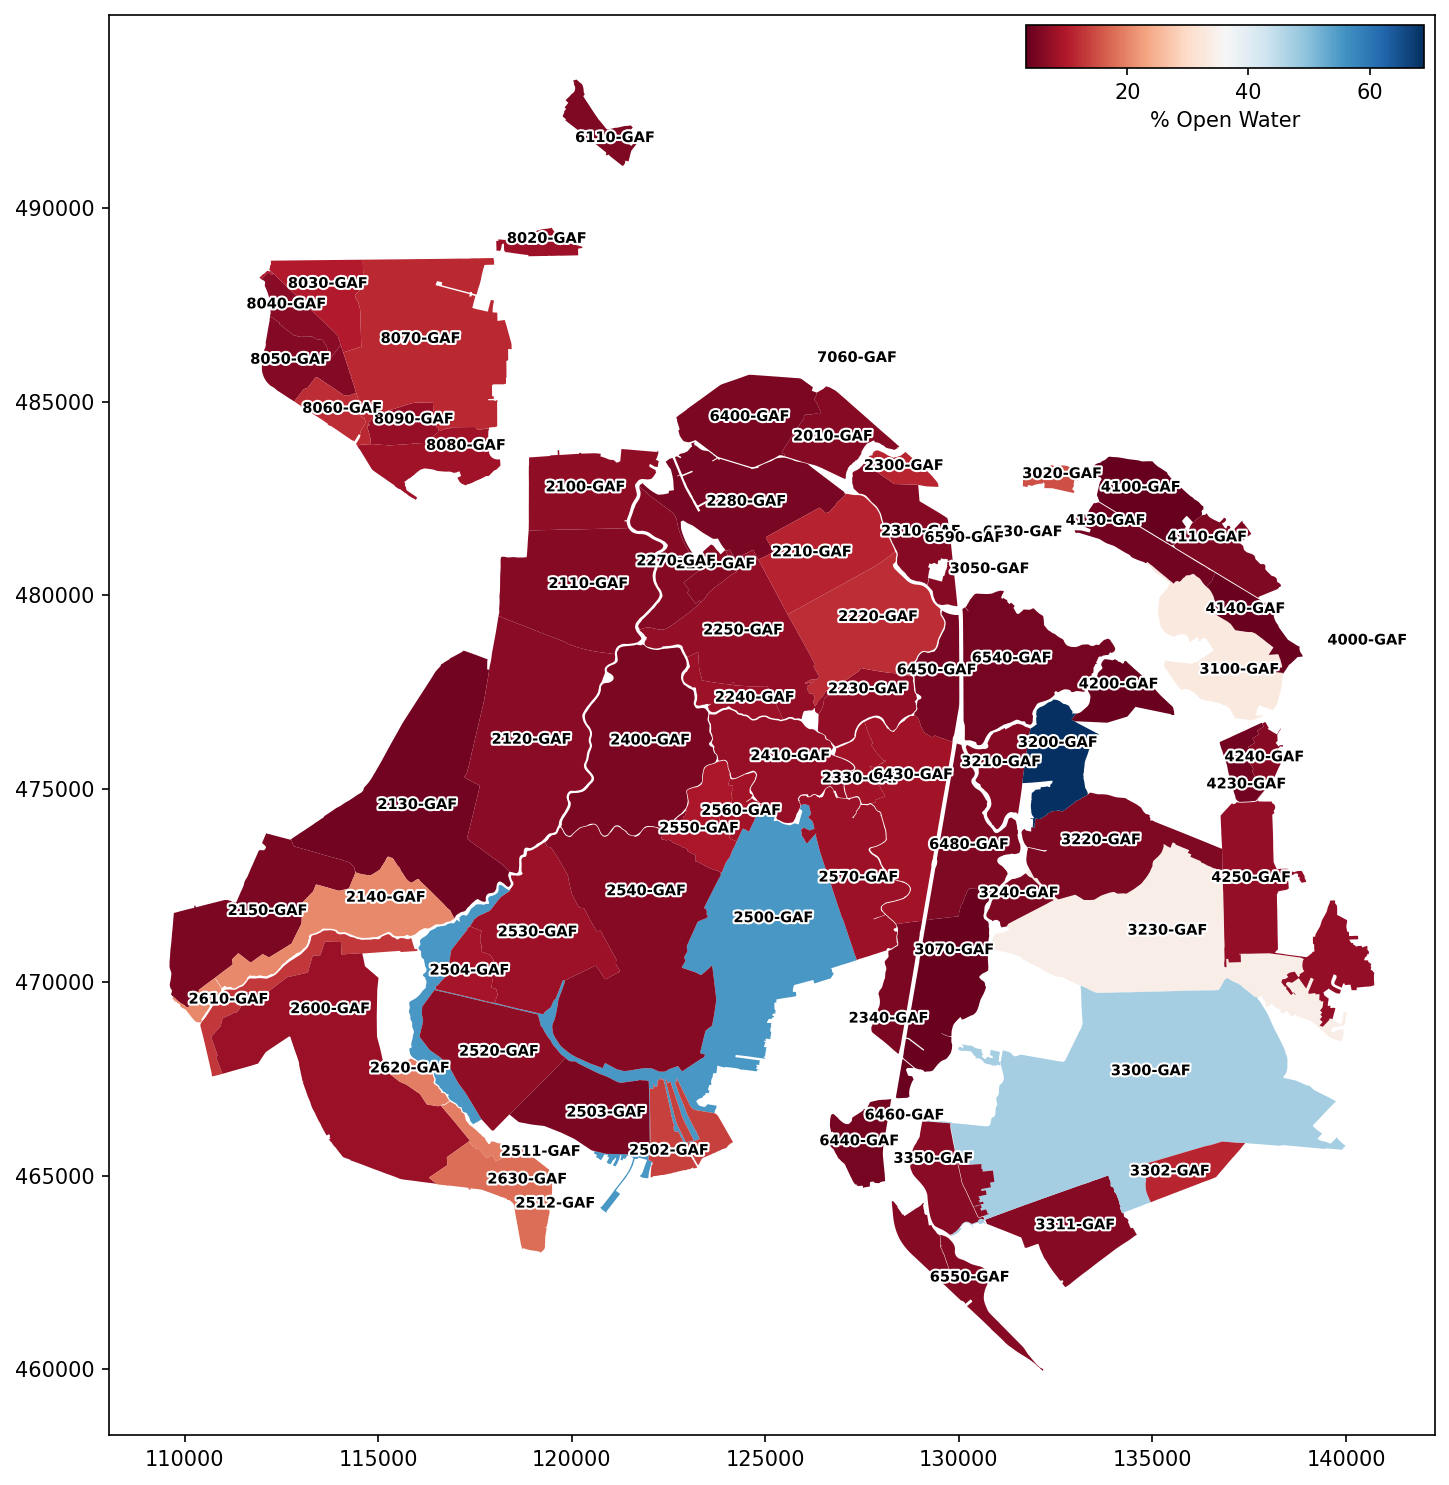

In [16]:
# plot gdf
ax = eagtools.plot_gdf(gdf, color_column=pw.name, cmap="RdBu",
                       vmin=gdf[pw.name].min(), vmax=gdf[pw.name].max(),
                       labels=True, fontsize=7, alpha=1.0)